## How the Algorithm Works  

The purpose of **Support Vector Machines (SVM)** is to determine a **hyperplane** that effectively separates data into two distinct categories in binary classification tasks.  

### Key Points  

#### **Hyperplane**  
A **hyperplane** is a geometric subspace that has one dimension less than its surrounding space. For instance, in an **n-dimensional space**, the hyperplane exists in **(n-1) dimensions**.  

In SVM, the objective is to **maximize the margin** between two classes. The equation of the hyperplane is given by:  

$$ w \cdot x - b = 0 $$  

where:  
- $ w $ represents the **weight vector**,  
- $ x $ is the **feature vector**, and  
- $ b $ is the **bias term**.  

To correctly classify data points, the following conditions must hold:  
- For a **data point** labeled as $ y = 1 $:  

  $$ w \cdot x - b \geq 1 $$  

- For a **data point** labeled as $ y = -1 $:  

  $$ w \cdot x - b \leq -1 $$  

More generally, this condition applies:  

$$ y (w \cdot x - b) \geq 1, \quad \forall \text{ data points}. $$  

---  

#### **Margin**  
The **margin** refers to the distance between the **hyperplane** and the closest data points from either class, known as **support vectors**. A **larger margin** typically leads to better model generalization and improved classification performance.  

---  

### **Gradient Equations**  
The **gradients** of the **cost function** with respect to the **weights** $ w $ and **bias** $ b $ are computed for **parameter updates** during training.  

The cost function consists of:  
1. A **margin maximization** term dependent on $ w $.  
2. A **regularization component** that mitigates overfitting.  

For a **data point** $ x_i $ with label $ y_i $ that meets the condition:  

$$ y_i (w \cdot x_i - b) \geq 1 $$  

(meaning it is classified correctly and lies **outside the margin**), the gradients are:  

$$ \frac{\partial J}{\partial w} = 2 \lambda w $$  
$$ \frac{\partial J}{\partial b} = 0 $$  

For a **data point** $ x_i $ with label $ y_i $ that **violates** $ y_i (w \cdot x_i - b) \geq 1 $ (i.e., it is either misclassified or within the margin), the gradients become:  

$$ \frac{\partial J}{\partial w} = 2 \lambda w - y_i x_i $$  
$$ \frac{\partial J}{\partial b} = -y_i $$  

where:  
- $ J $ represents the **SVM cost function**,  
- $ \lambda $ is the **regularization parameter**, which balances margin maximization and classification accuracy,  
- $ w $ denotes the **weight vector**,  
- $ b $ is the **bias term**,  
- $ x_i $ is the **ith data point**, and  
- $ y_i $ corresponds to its **class label**.  

This formulation enables the SVM to find an optimal **decision boundary** that maximizes the **margin** while ensuring correct classification, making it a core strategy in SVM learning.  

---  

### **Conclusion**  
SVM is a highly effective classification technique, especially in scenarios where:  
- The data exhibits **linear separability**.  
- A **larger margin** contributes to better model generalization.  
- The dataset comprises **a limited number of samples but has a high-dimensional feature space**.  

By carefully adjusting **regularization parameters** and incorporating **kernel functions** for handling non-linearly separable data, SVM can achieve robust classification performance in various machine learning applications.
sks.
ble data, SVM can achieve high performance in many machine learning tasks.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data = pd.read_csv("./breast_cancer_data/breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

C:\Users\paart\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


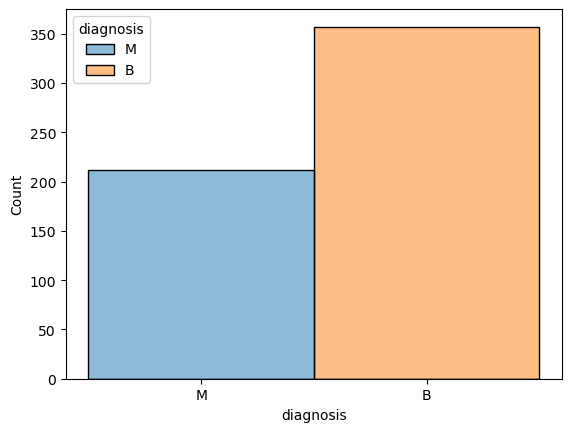

In [18]:
sns.histplot(data=data, x='diagnosis', hue='diagnosis')
plt.show()

C:\Users\paart\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area_mean', ylabel='Count'>

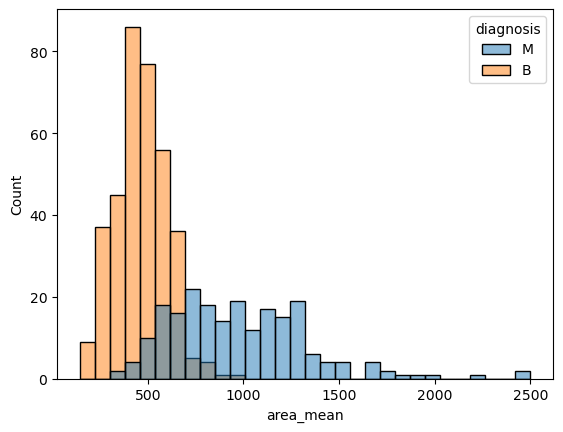

In [30]:
sns.histplot(data=data, x='area_mean', hue='diagnosis', kde=False, bins=30)

C:\Users\paart\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='radius_mean', ylabel='Count'>

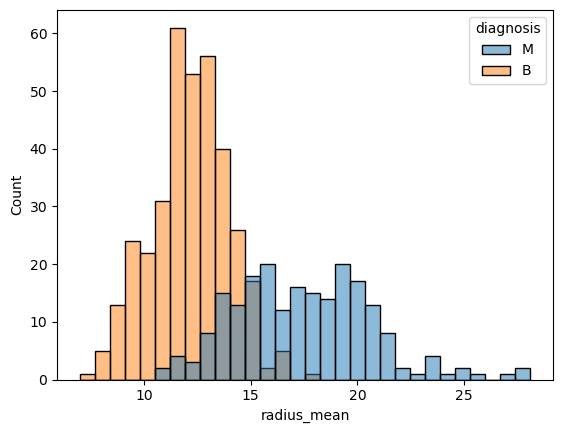

In [32]:
sns.histplot(data=data, x='radius_mean', hue='diagnosis', kde=False, bins=30)

C:\Users\paart\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='perimeter_mean', ylabel='Count'>

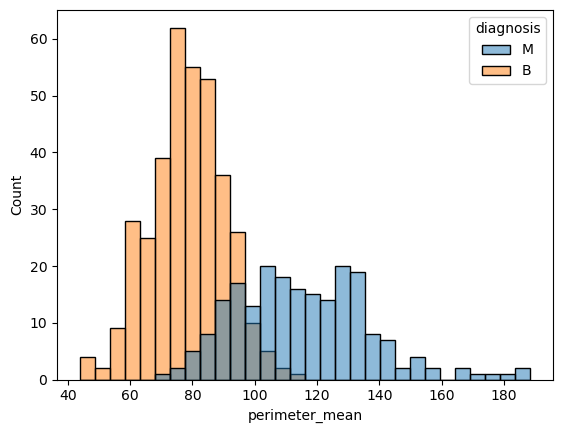

In [36]:
sns.histplot(data=data, x='perimeter_mean', hue='diagnosis', kde=False, bins=30)

C:\Users\paart\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='smoothness_mean', ylabel='Count'>

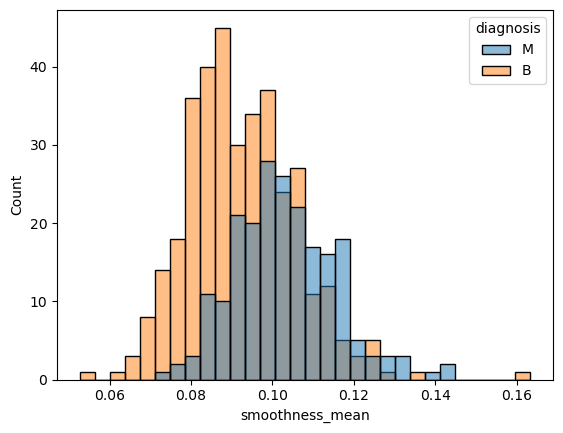

In [38]:
sns.histplot(data=data, x='smoothness_mean', hue='diagnosis', kde=False, bins=30)

## Data Preprocessing

In [41]:
data.drop('id', axis=1, inplace=True) #drop redundant columns

In [45]:
data['diagnosis'] = (data['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [47]:
corr = data.corr()

<Axes: >

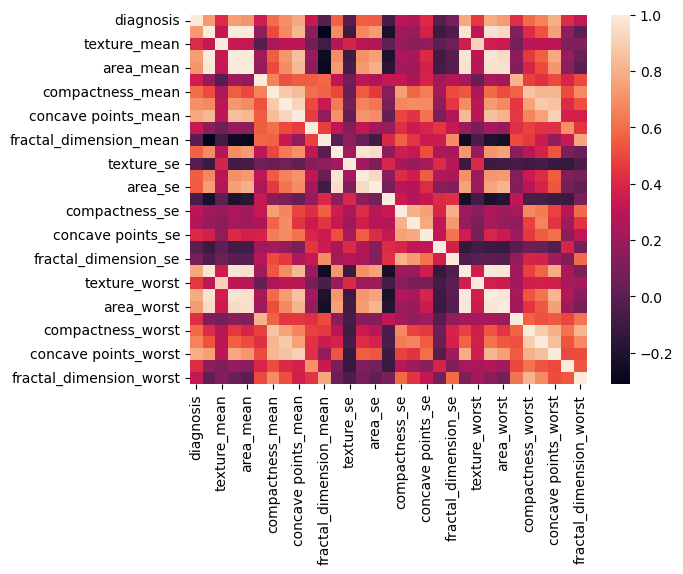

In [49]:
sns.heatmap(corr)

In [53]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


## Model Training

In [58]:
X = data[names].values
y = data['diagnosis']

In [60]:
def scale(X):
    """
    Standardizes the data in the array X.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).

    Returns:
        numpy.ndarray: The standardized features array.
    """
    # Calculate the mean and standard deviation of each feature
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Standardize the data
    X = (X - mean) / std
    return X
X = scale(X)

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 69)

In [66]:
from sklearn.svm import SVC

In [70]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [72]:
pred = model.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)

accuracy

0.9766081871345029